Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [2]:
data_m = data.resample('M').apply('sum')
data_m

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,23089022.0,1487486,743,11903,743,11903,2135,2159,8556,47,24,48
2002-02-28,20320720.0,1345344,1344,9744,672,30576,4752,2016,7728,24,24,24
2002-03-31,21483191.0,1489488,2232,11904,744,55800,8376,2376,8556,0,0,0
2002-04-30,20516472.0,1439438,2876,11153,1438,75863,11266,2034,8277,0,0,0
2002-05-31,20886798.0,1489488,3720,11904,1488,101184,14880,2232,8556,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30,19694352.0,1452960,2880,11160,1440,75960,11160,2160,8280,0,0,0
2018-05-31,21278364.0,1501392,3720,11904,1488,101184,14784,2160,8556,24,24,24
2018-06-30,23050418.0,1452960,4320,11160,1440,119880,17424,2232,8280,0,0,0


Подберите параметры модели SARIMAX для этого ряда.

In [3]:
import statsmodels.api as sm

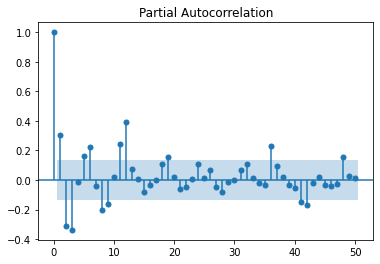

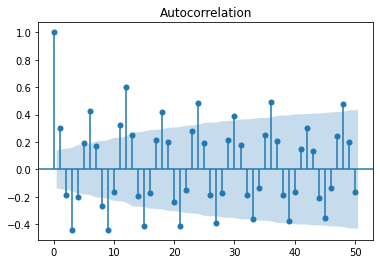

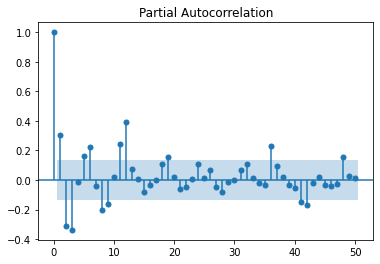

In [4]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=50)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=50)

Максимумы где-то до между 10-15. Цикличность видна.

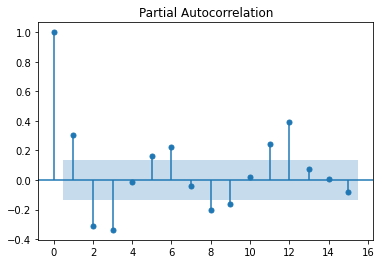

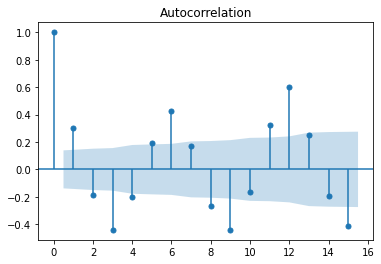

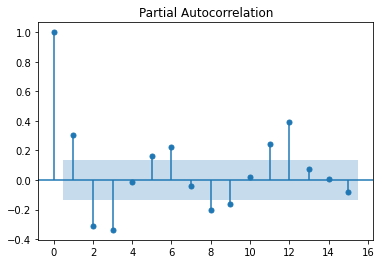

In [5]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=15)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=15)

а точнее 12 (логично, т.к. 12 месяцев=год

In [58]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, [12]))

results = {}

for order in pdq:
    for seasonal_order in seasonal_pdq:
        
        grid_model = sm.tsa.statespace.SARIMAX((data_m['PJME_MW'].values[:-50]),
                                         order=order, 
                                         seasonal_order=seasonal_order,
                                         trend='n',
                                         enforce_invertibility=False,
                                         enforce_stationarity=False)
        grid_result = grid_model.fit()
        results[grid_result.aic] = f'order={order}, seasonal_order={seasonal_order}'
        print(f'order={order}, seasonal_order={seasonal_order}, AIC:{grid_result.aic}')        

order=(0, 0, 0), seasonal_order=(0, 0, 0, 12), AIC:5485.949873218222
order=(0, 0, 0), seasonal_order=(0, 0, 1, 12), AIC:4953.723618970703
order=(0, 0, 0), seasonal_order=(0, 1, 0, 12), AIC:4265.164246734395
order=(0, 0, 0), seasonal_order=(0, 1, 1, 12), AIC:3889.3422674822664
order=(0, 0, 0), seasonal_order=(1, 0, 0, 12), AIC:4301.515415259222
order=(0, 0, 0), seasonal_order=(1, 0, 1, 12), AIC:4268.417380650872
order=(0, 0, 0), seasonal_order=(1, 1, 0, 12), AIC:3903.8222895412728
order=(0, 0, 0), seasonal_order=(1, 1, 1, 12), AIC:3873.681738186945
order=(0, 0, 1), seasonal_order=(0, 0, 0, 12), AIC:5344.404298730857
order=(0, 0, 1), seasonal_order=(0, 0, 1, 12), AIC:4888.055615069451
order=(0, 0, 1), seasonal_order=(0, 1, 0, 12), AIC:4220.183958744264
order=(0, 0, 1), seasonal_order=(0, 1, 1, 12), AIC:3845.556428741514
order=(0, 0, 1), seasonal_order=(1, 0, 0, 12), AIC:4945.77704081465
order=(0, 0, 1), seasonal_order=(1, 0, 1, 12), AIC:4876.154420229384
order=(0, 0, 1), seasonal_order=(

In [59]:
sorted(results.items())

[(3815.8286391652546, 'order=(0, 1, 1), seasonal_order=(1, 1, 1, 12)'),
 (3816.8772546383416, 'order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)'),
 (3819.085855942704, 'order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)'),
 (3819.9449157739646, 'order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)'),
 (3831.582240874481, 'order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)'),
 (3831.970625193694, 'order=(0, 0, 1), seasonal_order=(1, 1, 1, 12)'),
 (3840.6964345597476, 'order=(1, 0, 1), seasonal_order=(0, 1, 1, 12)'),
 (3845.556428741514, 'order=(0, 0, 1), seasonal_order=(0, 1, 1, 12)'),
 (3852.929781510039, 'order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)'),
 (3859.395585382931, 'order=(1, 0, 0), seasonal_order=(1, 1, 0, 12)'),
 (3859.984625778832, 'order=(1, 1, 0), seasonal_order=(1, 1, 1, 12)'),
 (3860.8458328268134, 'order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)'),
 (3861.093155979664, 'order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)'),
 (3864.124470334356, 'order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)'),
 

лучший информационный критерий Акаике у (3815.8286391652546, 'order=(0, 1, 1), seasonal_order=(1, 1, 1, 12)')

результат (3845.556428741514, 'order=(0, 0, 1), seasonal_order=(0, 1, 1, 12)'), не сильно хуже, но заметно проще модель

In [60]:
SARIMAX_model = sm.tsa.statespace.SARIMAX((data_m['PJME_MW'].values[-200:-50]),
                                         order=(0, 0, 1), seasonal_order=(0, 1, 1, 12),
                                         trend='n',
                                         enforce_invertibility=False,
                                         enforce_stationarity=False)
SARIMAX_results = SARIMAX_model.fit()
SARIMAX_results.aic

3845.556428741514

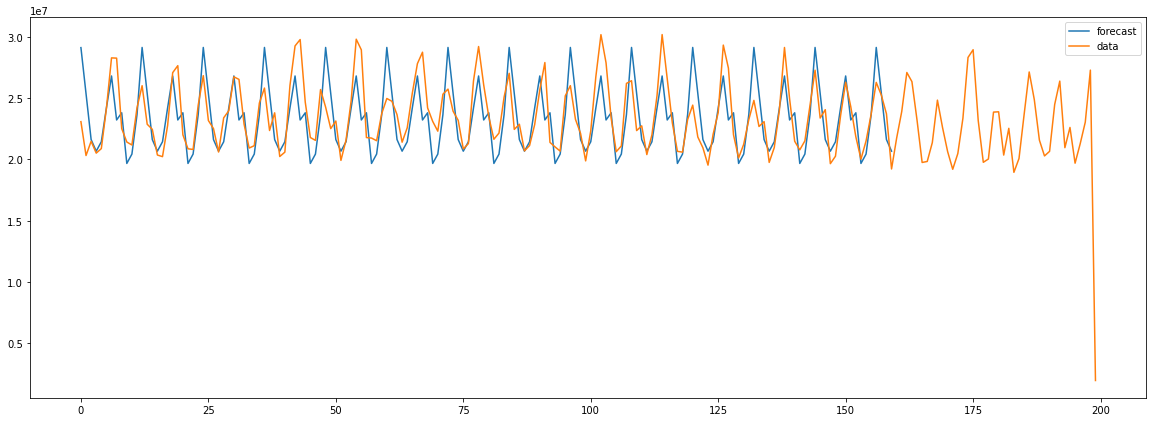

In [62]:
forecast = SARIMAX_results.forecast(len(data_m['PJME_MW'].values[:-50])+10)

plt.figure(figsize =(20,7))
plt.plot(forecast, label='forecast')
plt.plot(data_m['PJME_MW'].values, label='data')
plt.legend()

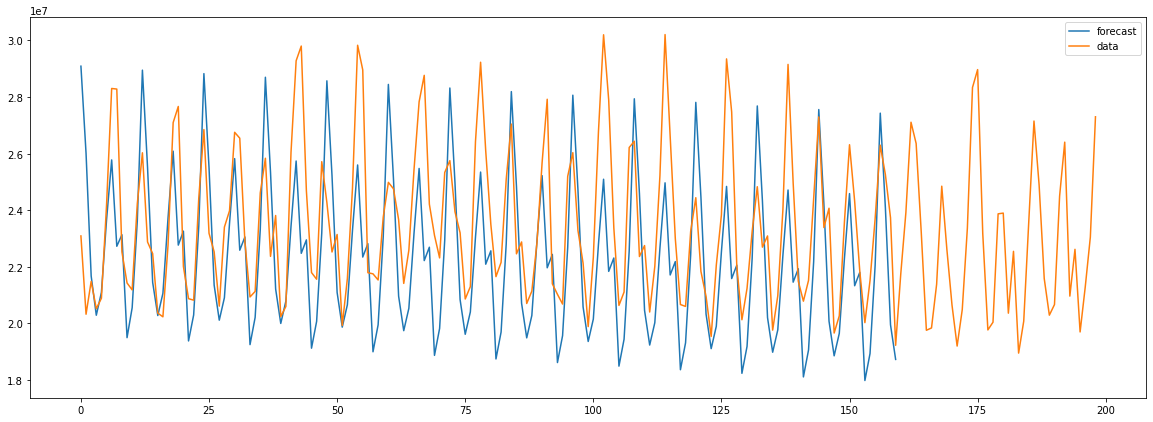

In [63]:
SARIMAX_model = sm.tsa.statespace.SARIMAX((data_m['PJME_MW'].values[-200:-50]),
                                         order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                                         trend='n',
                                         enforce_invertibility=False,
                                         enforce_stationarity=False)
SARIMAX_results = SARIMAX_model.fit()
SARIMAX_results.aic
forecast = SARIMAX_results.forecast(len(data_m['PJME_MW'].values[:-50])+10)
plt.figure(figsize =(20,7))
plt.plot(forecast, label='forecast')
plt.plot(data_m['PJME_MW'].values[:-1], label='data')
plt.legend()

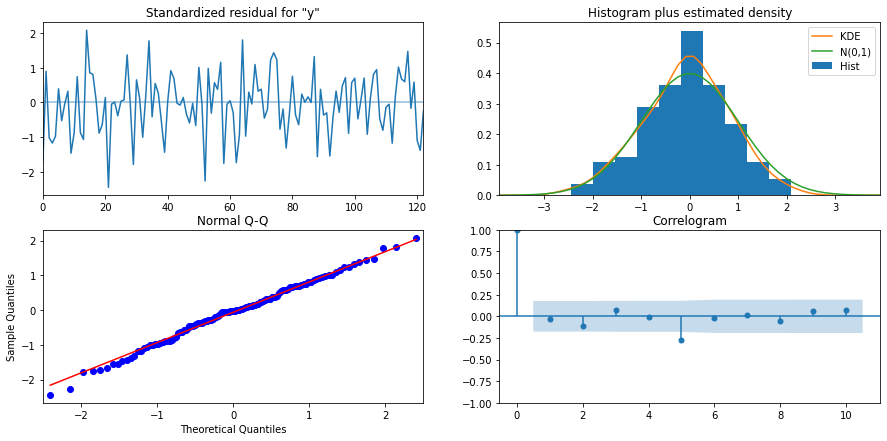

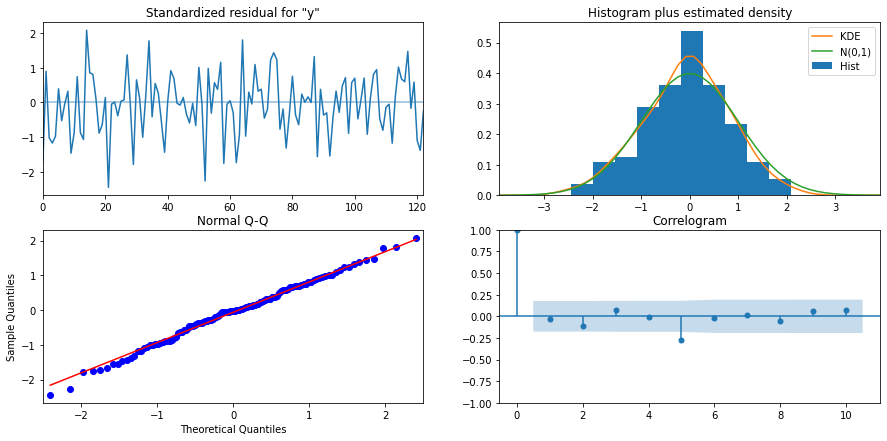

In [64]:
SARIMAX_results.plot_diagnostics(figsize=(15,7))

нормально

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Месячное потребление энергии предсказано вполне красиво

Постройте ACF, PACF и модель ARIMA для BRENT (lнедельный )

In [67]:
brent_data = pd.read_csv('my_BRENT2019.csv',sep = ',', index_col=[0], parse_dates=[0])
brent_data

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0


Text(0.5, 0, 't')

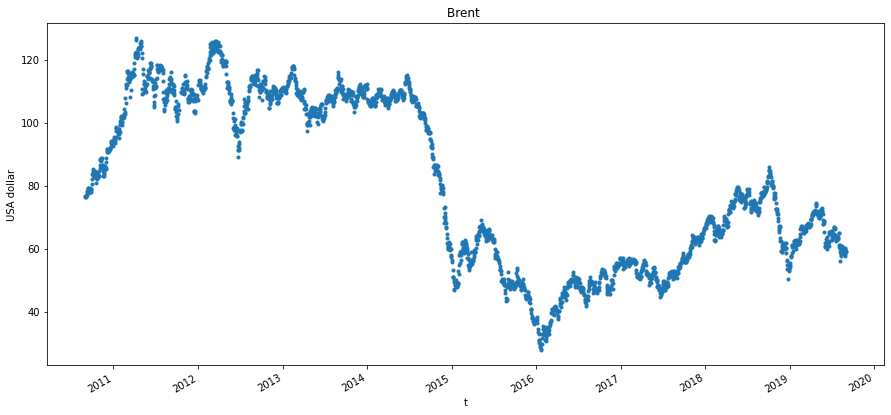

In [66]:
brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [74]:
brent_week = brent_data.resample('w').apply('mean')
brent_week

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.200000,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='Дата'>

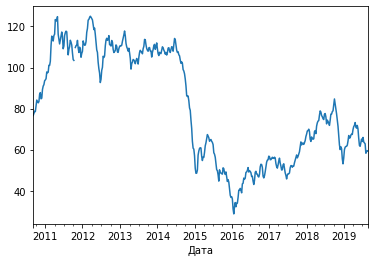

In [78]:
brent_week['Значение'].plot()

In [92]:
brent_week['Значение'].fillna(method='pad', inplace=True)

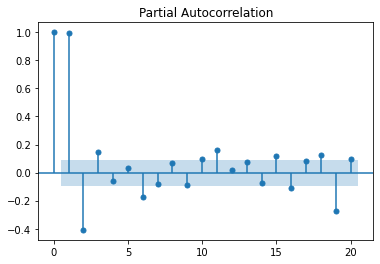

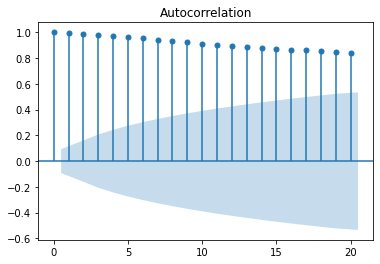

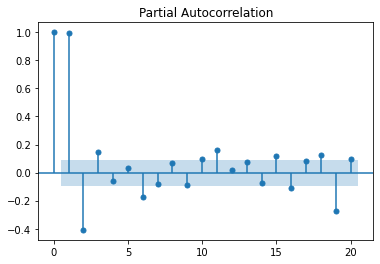

In [93]:
sm.graphics.tsa.plot_acf(brent_week['Значение'].values[25:], lags=20)
sm.graphics.tsa.plot_pacf(brent_week['Значение'].values[25:], lags=20)

посмотрим на продифференцированный

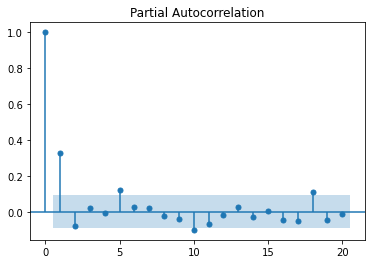

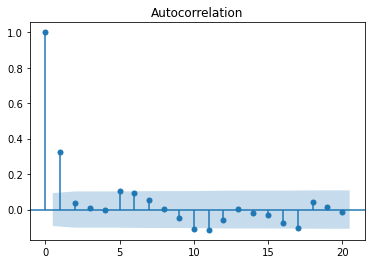

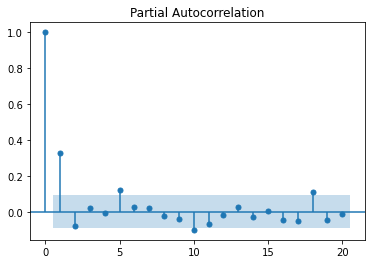

In [94]:
sm.graphics.tsa.plot_acf(brent_week['Значение'].diff(1).values[25:], lags=20)
sm.graphics.tsa.plot_pacf(brent_week['Значение'].diff(1).values[25:], lags=20)

In [157]:
from statsmodels.tsa.arima_model import ARIMA

N = 50
ARIMA_model = ARIMA(brent_week['Значение'][:-N], order=(1, 1, 1))
ARIMA_results = ARIMA_model.fit()
# делаем оценку старых значений
y_p = ARIMA_results.predict(len(brent_week[:-N]), len(brent_week[:-N]), typ='levels')
y_f = ARIMA_results.forecast(2*N)

c:\users\ifl\documents\github\ml-in-business\.venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MissingDataError: exog contains inf or nans

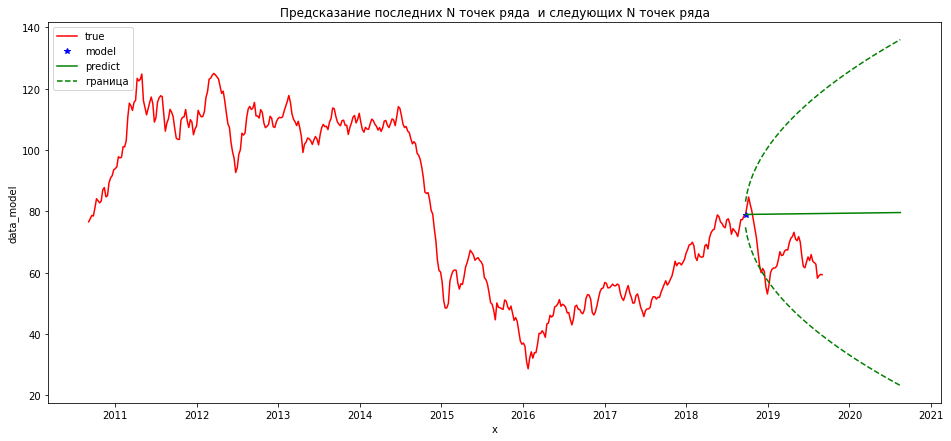

In [158]:
plt.figure(figsize=(16,7))
plt.plot(brent_week['Значение'],'r',label ='true')
plt.plot(brent_week.index[-N],y_p,'*b',label ='model')

dt = list(brent_week.index[-N:])
dt.extend(list(pd.date_range('2019-09-01', periods=51, freq='w')[1:]))

plt.plot(dt,y_f[0],'g',label ='predict')
plt.plot(dt, y_f[2][:,1],'--g', label = 'граница')
plt.plot(dt, y_f[2][:,0],'--g')
plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

Оцените результат моделирования

"Средненько" ) Цена будет примерно в коридоре. По существу мало толка от такого предсказания.

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Те модели, в которых есть тренд/цикличность и стационарный "шум"